# TX00DQ05-3001 Exercises 4

In [3]:
import numpy as np
import numpy.linalg as LA
import random

In [22]:
class Agent(object):
    steps = 0
    def __init__(self, startPos):
        self.startPos = startPos
        self.pos = startPos

In [115]:
def calculateValueForCurrentState(value,stepcost):
    #print("(",stepcost,"+",value,")*0.25 = ",((stepcost+(value))*0.25))
    return ((stepcost+(value))*0.25)


def checkWithBoundary(max,r,c,oR,oC):
    
    if 0 > r or max <= r or 0 > c or max <= c :
        #print(oR,",",oC," value:",V[oR,oC])
        return (oR,oC)
    else:
        #print(r,",",c," value:",V[r,c])
        return (r,c)

    
    
def Actions(val):
    if val == 0:
        return [1,0]
    elif val == 1:
        return [-1,0]
    elif val == 2:
        return [0,1]
    elif val == 3:
        return [0,-1]
    

def randomAction():
    return Actions(random.randint(0,3))

def makeAction(maxsize,r,c):
    a = randomAction()
    
    
    return checkWithBoundary(maxsize,r+a[0],c+a[1],r,c)

def checkIfInTerminatingPoint(pos,term):
    for t in term:
        if pos == t:
            return True
    return False

In [6]:
def CreateGridWorld(gridsize,terminating = None,numberOfTerminating = None):
    

    if(terminating == None):
        if(numberOfTerminating == 0 or numberOfTerminating == None):
            numberOfTerminating = 1
        terminating = []
        for n in range(numberOfTerminating):
            terminating.append((random.randint(0,gridsize[0]-1), \
                        random.randint(0,gridsize[1]-1)))
        
        
    gridworld = np.zeros((gridsize[0], gridsize[1]))
    
    print(terminating)
    print(gridworld)
    return gridworld, terminating

## Exercise 1: TD(0) value function estimation

Implement value function estimation for Sutton & Barto example 4.1 with TD(0) algorithm.

In [116]:
# YOUR CODE

def setRandomPosition(gridworld,terminating):
    randomPos = (random.randint(0,gridworld.shape[0]-1),random.randint(0,gridworld.shape[0]-1))
    if checkIfInTerminatingPoint(randomPos,terminating):
        setRandomPosition(gridworld,terminating)
    return randomPos  
        
def calculateStatesNewValue(lengths,agent,old_s,a=0.8,r=-1):
    value = lengths[old_s] + a*(r + lengths[agent.pos] - lengths[old_s])
    return value

def TD(maxiters,gridworld,terminating,numberOfagents=1,randomPos=True):
    
    lengths= gridworld
    agents =[]
    
    while(len(agents) < numberOfagents):
        randomPos = (random.randint(0,lengths.shape[0]-1),random.randint(0,lengths.shape[0]-1))
        x = randomPos[0]
        y = randomPos[1]
        if not checkIfInTerminatingPoint((x,y),terminating):
            agents.append( Agent((x,y)) )
    
    for i in range(1, maxiters):


        
        for agent in agents:
            old_state=(0,0)
            old_value= 0
            
            if randomPos:
                agent.pos = setRandomPosition(gridworld,terminating)
            else:    
                agent.pos = agent.startPos
                
            while(checkIfInTerminatingPoint(agent.pos,terminating)== False):
                old_state = agent.pos
                agent.pos = makeAction(lengths.shape[0],agent.pos[0],agent.pos[1])
                lengths[old_state] = calculateStatesNewValue(lengths,agent,old_state,)
                agent.steps += 1 
                
                
                   
        #print() 
        #print(lengths)
    return lengths



In [117]:
gridworld,terminating = CreateGridWorld((4,4),[(0,0),(3,3)],)
with np.printoptions(precision=2):
    print(TD(1000,gridworld,terminating,))

[(0, 0), (3, 3)]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[  0.   -10.25 -15.26 -10.42]
 [ -5.07 -18.51 -18.48 -19.01]
 [-29.58 -24.27 -16.28  -1.88]
 [-11.61 -14.08  -3.97   0.  ]]


## Exercise 2: Implement TD(0) control 

Solve Sutton & Barto example 4.1 with TD(0) control (Sarsa) algorithm. Apply the algorithm to the windy world of Sutton & Barto example 6.5. 

In [138]:

def makeGreedyAction(world,s):
    new_s=(1,1)
    v=(1,1)

    for i in range(4):
        
        a=Actions(i) 
        #print(world.shape[0],s[0]+a[0],s[1]+a[1],s[0],s[1])
        v=checkWithBoundary(world.shape[0],s[0]+a[0],s[1]+a[1],s[0],s[1])
        
        if world[new_s] >= world[v]:
            new_s = v
    return new_s

def epsilon_greedy_action(world,s,greedy=10):
    
    e = random.randint(0,100)
    if e > greedy:
        return makeGreedyAction(world,s)
    else:
        return makeAction(world.shape[0],s[0],s[1])
    
    
     

In [139]:
def TD_Sarsa(maxiters,gridworld,terminating,numberOfagents=1,randomPos=True):
    
    lengths= gridworld
    agents =[]
    
    while(len(agents) < numberOfagents):
        randomPos = (random.randint(0,lengths.shape[0]-1),random.randint(0,lengths.shape[0]-1))
        x = randomPos[0]
        y = randomPos[1]
        if not checkIfInTerminatingPoint((x,y),terminating):
            agents.append( Agent((x,y)) )
    
    for i in range(1, maxiters):


        
        for agent in agents:
            old_state=(0,0)
            old_value= 0
            
            if randomPos:
                agent.pos = setRandomPosition(gridworld,terminating)
            else:    
                agent.pos = agent.startPos
                
            while(checkIfInTerminatingPoint(agent.pos,terminating)== False):
                old_state = agent.pos
                agent.pos = epsilon_greedy_action(lengths,old_state)
                lengths[old_state] = calculateStatesNewValue(lengths,agent,old_state,)
                agent.steps += 1 
                
                
                   
        #print() 
        #print(lengths)
    return lengths


In [145]:
gridworld,terminating = CreateGridWorld((4,4),[(0,0),(3,3)],)
with np.printoptions(precision=2):
    print(TD_Sarsa(1000,gridworld,terminating,3,randomPos=False))

[(0, 0), (3, 3)]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[   0.   -194.19 -206.15 -167.72]
 [ -54.42 -226.71 -150.65 -228.86]
 [-268.78 -238.69 -278.63 -197.4 ]
 [-259.71 -170.5   -53.64    0.  ]]


## Exercise 3*: Eligibility trace

Do a random walk in example 4.1 gridworld, and create an eligibility trace from the walk.

*) - not mandatory

In [237]:
# YOUR CODE
def eligibility_trace(maxiters,gridworld,terminating,numberOfagents=1,randomPos=True,maxSteps=10):
    
    lengths= gridworld
    agents =[]
    trace = 0
    traces=[]
    visitedTimes= 0
    threshold =0
    while(len(agents) < numberOfagents):
        randomPos = (random.randint(0,lengths.shape[0]-1),random.randint(0,lengths.shape[0]-1))
        x = randomPos[0]
        y = randomPos[1]
        if not checkIfInTerminatingPoint((x,y),terminating):
            agents.append( Agent((x,y)) )
    
    for i in range(1, maxiters):


        
        for agent in agents:
            old_state=(0,0)
            old_value= 0
            
            if randomPos:
                agent.pos = setRandomPosition(gridworld,terminating)
            else:    
                agent.pos = agent.startPos
                
            for step in range(maxSteps):
                old_state = agent.pos
                agent.pos = makeAction(lengths.shape[0],agent.pos[0],agent.pos[1])
                lengths[old_state] = calculateStatesNewValue(lengths,agent,old_state,)
                if(checkIfInTerminatingPoint(agent.pos,terminating)== True):
                    trace +=1
                    visitedTimes +=1
                else:
                    trace-=0.05
                if(trace < threshold):
                    trace =0
                traces.append(trace)      
                   
        
    return traces,visitedTimes

gridworld,terminating = CreateGridWorld((4,4),[(0,0)],)
et,vt = eligibility_trace(100,gridworld,terminating,1,randomPos=True)


[(0, 0)]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Times of visits to a state:  38


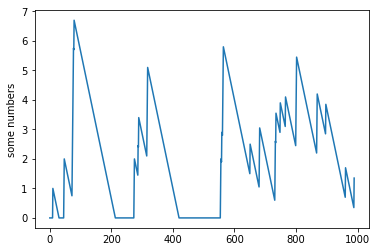

In [238]:
import matplotlib.pyplot as plt
print("Times of visits to a state: ", vt)
plt.plot(et)
plt.ylabel('some numbers')
plt.show()

## Exercise 4**: TD(lambda)

Implement TD(lambda) algorithm and use it for solving example 6.5. Create a table/plot on the effect of lambda in the performance of the algorithm.

*) - not mandatory

In [5]:
# YOUR CODE
